# Radiometric Operation on Image


## Image colorspace and thresholding

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [3]:
import cv2

In [4]:
def wind(image):
    cv2.namedWindow("image", cv2.WINDOW_NORMAL)
    cv2.imshow("image", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
bright = cv2.imread("cube1.jpg")
dark = cv2.imread("cube8.jpg")

In [6]:
wind(bright)
wind(dark)

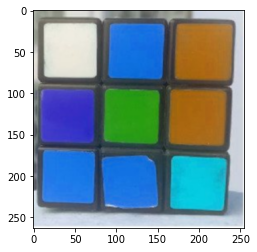

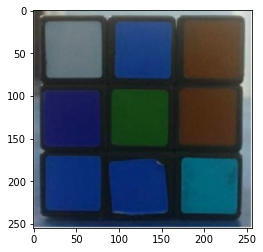

In [7]:
plt.imshow(bright, interpolation="bicubic")
plt.show()
plt.imshow(dark, interpolation="bicubic")
plt.show()

In [8]:
brightLAB = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(dark, cv2.COLOR_BGR2LAB)

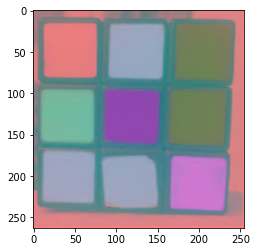

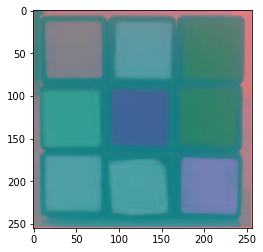

In [9]:
wind(brightLAB)
plt.imshow(brightLAB, interpolation="bicubic")
plt.show()
wind(darkLAB)
plt.imshow(darkLAB, interpolation="bicubic")
plt.show()

In [10]:
brightYCB = cv2.cvtColor(bright, cv2.COLOR_BGR2YCrCb)
darkYCB = cv2.cvtColor(dark, cv2.COLOR_BGR2YCrCb)

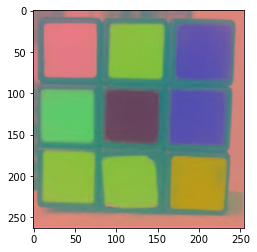

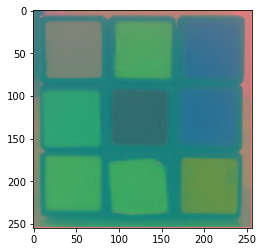

In [11]:
wind(brightYCB)
plt.imshow(brightYCB, interpolation="bicubic")
plt.show()
wind(darkYCB)
plt.imshow(darkYCB, interpolation="bicubic")
plt.show()

In [12]:
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)

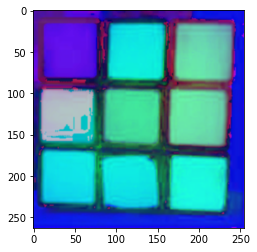

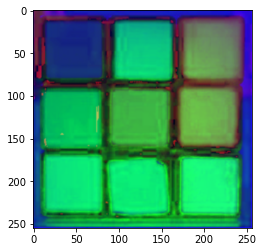

In [13]:
wind(brightHSV)
plt.imshow(brightHSV, interpolation="bicubic")
plt.show()
wind(darkHSV)
plt.imshow(darkHSV, interpolation="bicubic")
plt.show()

In [14]:
bgr = [40, 158, 16]

thresh = 40

minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])
maskBGR = cv2.inRange(bright, minBGR, maxBGR)
resultBGR = cv2.bitwise_and(bright, bright, mask=maskBGR)
# convert 1D array to 3D, then convert it to HSV and take the first element
# this will be same as shown in the above figure [65, 229, 158]
hsv = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2HSV)[0][0]
minHSV = np.array([hsv[0] - thresh, hsv[1] - thresh, hsv[2] - thresh])
maxHSV = np.array([hsv[0] + thresh, hsv[1] + thresh, hsv[2] + thresh])
maskHSV = cv2.inRange(brightHSV, minHSV, maxHSV)
resultHSV = cv2.bitwise_and(brightHSV, brightHSV, mask=maskHSV)
# convert 1D array to 3D, then convert it to YCrCb and take the first element
ycb = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2YCrCb)[0][0]
minYCB = np.array([ycb[0] - thresh, ycb[1] - thresh, ycb[2] - thresh])
maxYCB = np.array([ycb[0] + thresh, ycb[1] + thresh, ycb[2] + thresh])
maskYCB = cv2.inRange(brightYCB, minYCB, maxYCB)
resultYCB = cv2.bitwise_and(brightYCB, brightYCB, mask=maskYCB)

# convert 1D array to 3D, then convert it to LAB and take the first element
lab = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2LAB)[0][0]
minLAB = np.array([lab[0] - thresh, lab[1] - thresh, lab[2] - thresh])
maxLAB = np.array([lab[0] + thresh, lab[1] + thresh, lab[2] + thresh])
maskLAB = cv2.inRange(brightLAB, minLAB, maxLAB)
resultLAB = cv2.bitwise_and(brightLAB, brightLAB, mask=maskLAB)

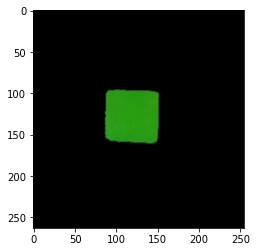

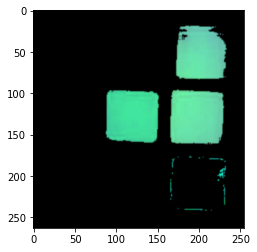

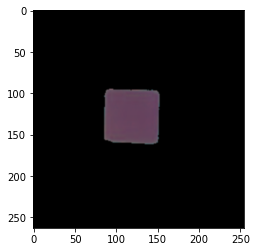

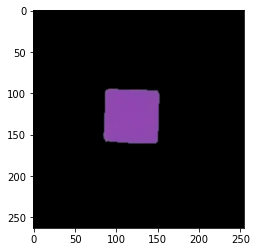

In [15]:
wind(resultBGR)
plt.imshow(resultBGR, interpolation="bicubic")
plt.show()
wind(resultHSV)
plt.imshow(resultHSV, interpolation="bicubic")
plt.show()
wind(resultYCB)
plt.imshow(resultYCB, interpolation="bicubic")
plt.show()
wind(resultLAB)
plt.imshow(resultLAB, interpolation="bicubic")
plt.show()

## Color Spaces and Reading Images in OpenCV

In [33]:
flags = [i for i in dir(cv2) if i.startswith("COLOR_")]

In [34]:
len(flags)

274

In [35]:
flags[50]

'COLOR_BGR2XYZ'

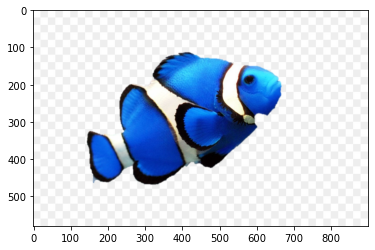

In [36]:
nemo = cv2.imread("fish.jpg")
plt.imshow(nemo)
plt.show()

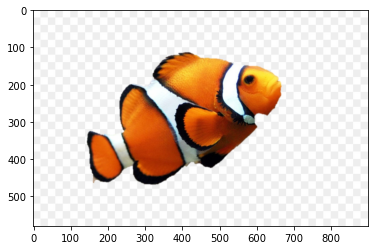

In [37]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

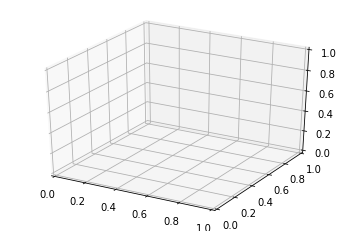

In [39]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [40]:
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

Text(0.5, 0, 'Blue')

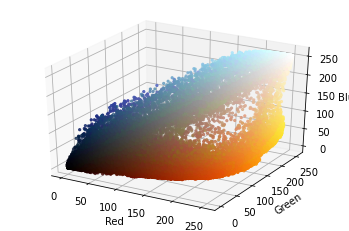

In [44]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")

### Visualizing Nemo in HSV Color Space

In [45]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

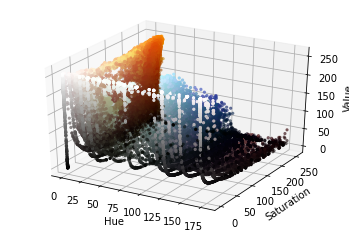

In [46]:
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [47]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [48]:
from matplotlib.colors import hsv_to_rgb

In [49]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

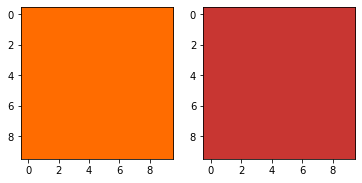

In [50]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [51]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [52]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

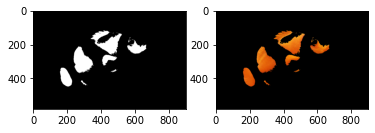

In [53]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [54]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

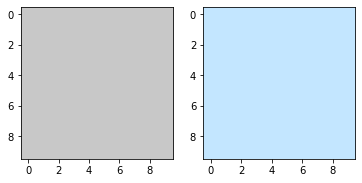

In [55]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

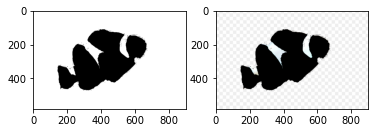

In [56]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

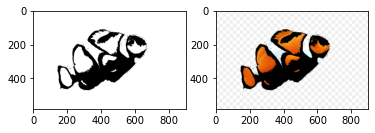

In [57]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

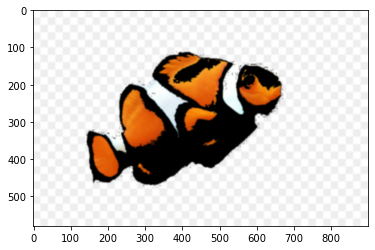

In [58]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.imshow(blur)
plt.show()

## Thresolding

In [66]:
img = cv2.imread("butterfly.png")
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)
gaus = cv2.adaptiveThreshold(
    grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1
)
retval2, otsu = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow("original", img)
cv2.imshow("threshold", threshold)
cv2.imshow("threshold2", threshold2)
cv2.imshow("gaus", gaus)
cv2.imshow("otsu", otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
img = cv2.imread("victoria.png")
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)
gaus = cv2.adaptiveThreshold(
    grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1
)
retval2, otsu = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow("original", img)
cv2.imshow("threshold", threshold)
cv2.imshow("threshold2", threshold2)
cv2.imshow("gaus", gaus)
cv2.imshow("otsu", otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
img = cv2.imread("fish.jpg")
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval2, threshold2 = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)
gaus = cv2.adaptiveThreshold(
    grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1
)
retval2, otsu = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow("original", img)
cv2.imshow("threshold", threshold)
cv2.imshow("threshold2", threshold2)
cv2.imshow("gaus", gaus)
cv2.imshow("otsu", otsu)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image histogram extraction and manipulation

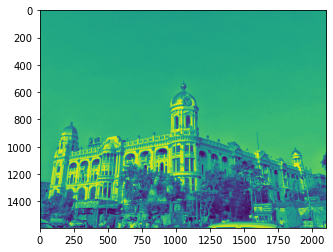

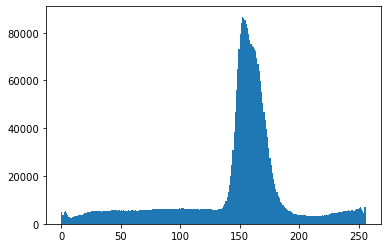

In [71]:
img = cv2.imread("kolkata.jpg", 0)
plt.imshow(img)
plt.show()
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

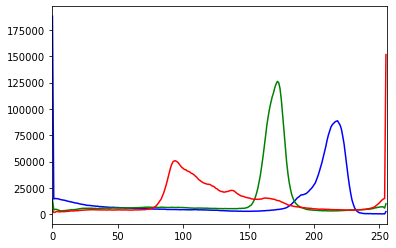

In [73]:
img = cv2.imread("kolkata.jpg")
color = ("b", "g", "r")
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

## image manipulation

## 1. scikit-image

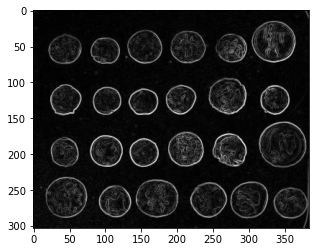

In [88]:
import matplotlib.pyplot as plt

%matplotlib inline

from skimage import data, filters

image = data.coins()  # ... or any other NumPy array!
edges = filters.sobel(image)
plt.imshow(edges, cmap="gray")

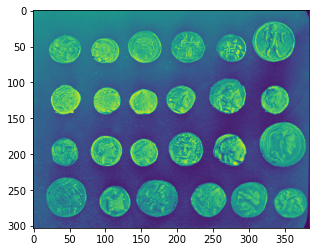

In [90]:
plt.imshow(image)

## 2. NumPy

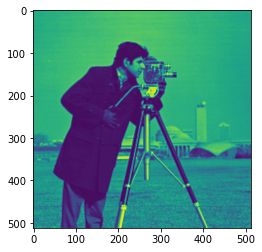

In [92]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

%matplotlib inline

image = data.camera()
plt.imshow(image)

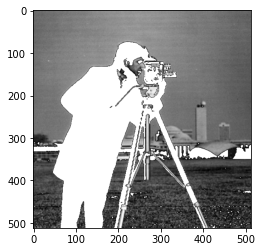

In [93]:
type(image)
np.ndarray  # Image is a NumPy array:

mask = image < 87
image[mask] = 255
plt.imshow(image, cmap="gray")

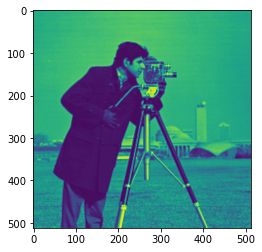

In [94]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.imshow(camera)

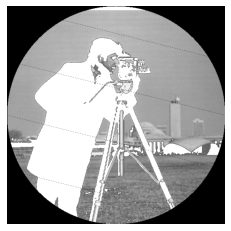

In [95]:
camera[:10] = 0
mask = camera < 87
camera[mask] = 255
inds_x = np.arange(len(camera))
inds_y = (4 * inds_x) % len(camera)
camera[inds_x, inds_y] = 0

l_x, l_y = camera.shape[0], camera.shape[1]
X, Y = np.ogrid[:l_x, :l_y]
outer_disk_mask = (X - l_x / 2) ** 2 + (Y - l_y / 2) ** 2 > (l_x / 2) ** 2
camera[outer_disk_mask] = 0

plt.figure(figsize=(4, 4))
plt.imshow(camera, cmap="gray")
plt.axis("off")
plt.show()

## 3. SciPy

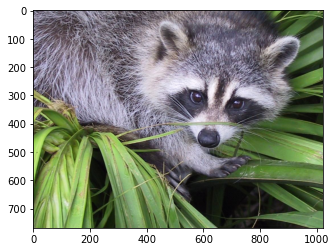

In [96]:
from scipy import misc, ndimage

face = misc.face()
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)

# Results
plt.imshow(face)

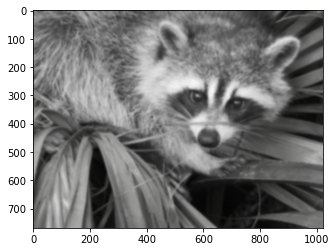

In [97]:
plt.imshow(blurred_face)

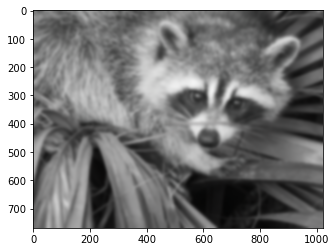

In [98]:
plt.imshow(very_blurred)

## 4. PIL/Pillow

In [102]:
from PIL import Image, ImageFilter

# Read image
im = Image.open("image.jpg")
# Display image
im.show()

In [103]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
enh.enhance(1.8).show("30% more contrast")

## 5. OpenCV-Python

In [107]:
import cv2
import numpy as np

In [108]:
# Step-2
# Find the Gaussian pyramid of the two images and the mask
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr

In [109]:
# Step-3
# Then calculate the Laplacian pyramid
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1

    laplacian_pyr = [laplacian_top]
    for i in range(num_levels, 0, -1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i - 1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr

In [110]:
# Step-4
# Now blend the two images wrt. the mask
def blend(laplacian_A, laplacian_B, mask_pyr):
    LS = []
    for la, lb, mask in zip(laplacian_A, laplacian_B, mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        LS.append(ls)
    return LS

In [111]:
# Step-5
# Reconstruct the original image
def reconstruct(laplacian_pyr):
    laplacian_top = laplacian_pyr[0]
    laplacian_lst = [laplacian_top]
    num_levels = len(laplacian_pyr) - 1
    for i in range(num_levels):
        size = (laplacian_pyr[i + 1].shape[1], laplacian_pyr[i + 1].shape[0])
        laplacian_expanded = cv2.pyrUp(laplacian_top, dstsize=size)
        laplacian_top = cv2.add(laplacian_pyr[i + 1], laplacian_expanded)
        laplacian_lst.append(laplacian_top)
    return laplacian_lst

In [112]:
# Now let's call all these functions
if __name__ == "__main__":
    # Step-1
    # Load the two images
    img1 = cv2.imread("apple.jpg")
    img1 = cv2.resize(img1, (1800, 1000))
    img2 = cv2.imread("orange.jpg")
    img2 = cv2.resize(img2, (1800, 1000))

    # Create the mask
    mask = np.zeros((1000, 1800, 3), dtype="float32")
    mask[250:500, 640:1440, :] = (1, 1, 1)

    num_levels = 7

    # For image-1, calculate Gaussian and Laplacian
    gaussian_pyr_1 = gaussian_pyramid(img1, num_levels)
    laplacian_pyr_1 = laplacian_pyramid(gaussian_pyr_1)
    # For image-2, calculate Gaussian and Laplacian
    gaussian_pyr_2 = gaussian_pyramid(img2, num_levels)
    laplacian_pyr_2 = laplacian_pyramid(gaussian_pyr_2)
    # Calculate the Gaussian pyramid for the mask image and reverse it.
    mask_pyr_final = gaussian_pyramid(mask, num_levels)
    mask_pyr_final.reverse()
    # Blend the images
    add_laplace = blend(laplacian_pyr_1, laplacian_pyr_2, mask_pyr_final)
    # Reconstruct the images
    final = reconstruct(add_laplace)
    # Save the final image to the disk
    cv2.imwrite("pp2.jpg", final[num_levels])

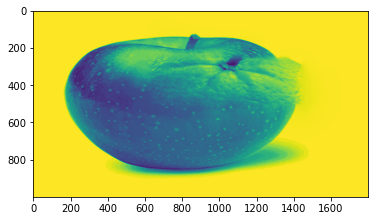

In [117]:
img = cv2.imread("pp2.jpg", 0)
plt.imshow(img)
plt.show()